In [66]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [67]:
anymal_bar_happo = []
anymal_bar_mappo = []
push_happo = []
push_mappo = []
hand_happo = []
hand_mappo = []

for filename in os.listdir('./data/avg_rewards'):
    filename_lower = filename.lower()
    # start_idx = filename.find('0000')
    df = pd.read_csv(os.path.join('./data/avg_rewards', filename))
    # df['seed'] = filename[start_idx:start_idx+5]
    if 'push' in filename_lower and 'happo' in filename_lower:
        push_happo.append(df)
    elif 'push' in filename_lower and 'mappo' in filename_lower:
        push_mappo.append(df)
    elif 'multi-agent' in filename_lower and 'happo' in filename_lower:
        anymal_bar_happo.append(df)
    elif 'multi-agent' in filename_lower and 'mappo' in filename_lower:
        anymal_bar_mappo.append(df)
    elif 'hand' in filename_lower and 'happo' in filename_lower:
        hand_happo.append(df)
    elif 'hand' in filename_lower and 'mappo' in filename_lower:
        hand_mappo.append(df)
    

push_happo = pd.concat(push_happo)
push_mappo = pd.concat(push_mappo)
anymal_bar_happo = pd.concat(anymal_bar_happo)
anymal_bar_mappo = pd.concat(anymal_bar_mappo)
hand_happo = pd.concat(hand_happo)
hand_mappo = pd.concat(hand_mappo)

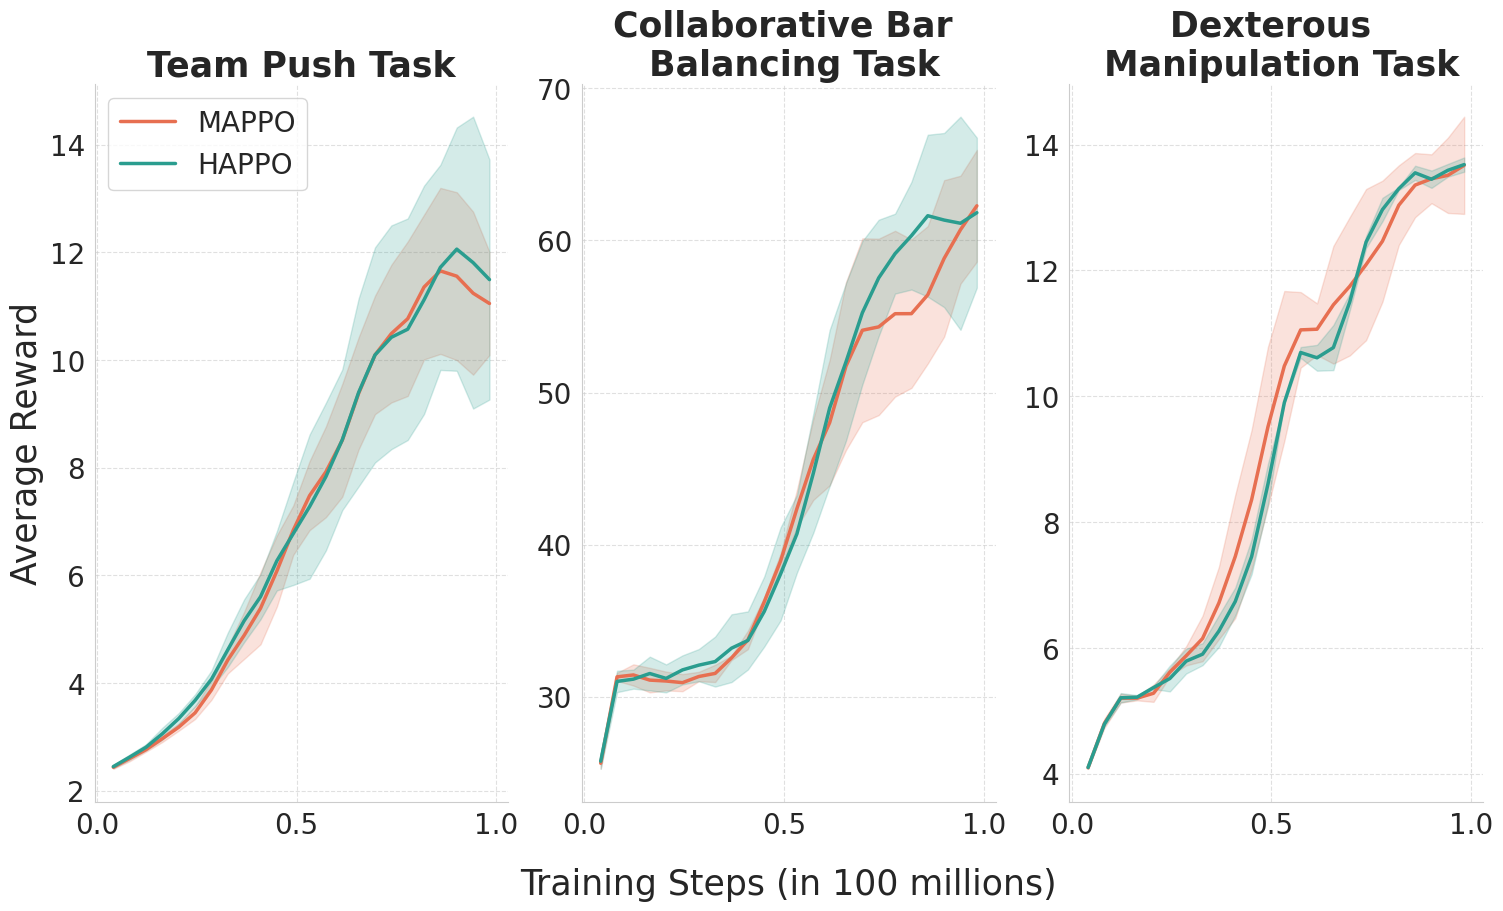

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create high-contrast plots as subplots
def plot_results(ax, data_mappo, data_happo, title, mappo_color, happo_color):
    x = np.array(sorted(data_mappo['Step'].unique())) / 1e8
    mean_mappo = data_mappo.groupby('Step')['Value'].mean().values
    std_mappo = data_mappo.groupby('Step')['Value'].std().values

    # Plot MAPPO with strong contrast
    ax.plot(x, mean_mappo, label="MAPPO", color=mappo_color, linewidth=2.5)
    ax.fill_between(x, mean_mappo - std_mappo, mean_mappo + std_mappo, alpha=0.2, color=mappo_color)

    mean_happo = data_happo.groupby('Step')['Value'].mean().values
    std_happo = data_happo.groupby('Step')['Value'].std().values

    # Plot HAPPO with strong contrast
    ax.plot(x, mean_happo, label="HAPPO", color=happo_color, linewidth=2.5)
    ax.fill_between(x, mean_happo - std_happo, mean_happo + std_happo, alpha=0.2, color=happo_color)

    # Improve aesthetics
    # ax.set_xlabel("Training Steps", fontsize=12)
    # ax.set_ylabel("Reward", fontsize=12)
    ax.set_title(title, fontsize=25, fontweight="bold")
    ax.grid(True, linestyle="--", alpha=0.6)
    
    sns.despine(ax=ax)

# Distinct colors for high contrast
colors = {
    # "push": ("#E63946", "#1D3557"),   # Red vs. Deep Blue
    # "anymal": ("#F4A261", "#264653"), # Orange vs. Dark Teal
    # "hand": ("#E76F51", "#2A9D8F")    # Burnt Red vs. Green
    "push": ("#E76F51", "#2A9D8F"),   # Red vs. Deep Blue
    "anymal": ("#E76F51", "#2A9D8F"), # Orange vs. Dark Teal
    "hand": ("#E76F51", "#2A9D8F")    # Burnt Red vs. Green
}

# Create a single row of three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 9), constrained_layout=True)

# Apply the function to each subplot
plot_results(axes[0], push_mappo, push_happo, "Team Push Task", colors["push"][0], colors["push"][1])
plot_results(axes[1], anymal_bar_mappo, anymal_bar_happo, "Collaborative Bar \n Balancing Task", colors["anymal"][0], colors["anymal"][1])
plot_results(axes[2], hand_mappo, hand_happo, "Dexterous \n Manipulation Task", colors["hand"][0], colors["hand"][1])

axes[0].set_ylabel("Average Reward", fontsize=25)
axes[1].set_xlabel("Training Steps (in 100 millions)", fontsize=25, labelpad=20)
axes[0].legend(fontsize=20, frameon=True)

for ax in axes:
    ax.tick_params(axis='both', labelsize=20)
# plt.tight_layout()
# Show the final figure
plt.show()